In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime, date

In [2]:
# Loading the data in the Data frame.
new_cust = pd.read_excel("Raw_data.xlsx",sheet_name="NewCustomerList")

C:\Users\Rakesh Rao\AppData\Local\Temp\ipykernel_14244\2422742102.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  new_cust = pd.read_excel("Raw_data.xlsx",sheet_name="NewCustomerList")


In [3]:
# checking the first five values

new_cust.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.42,0.525,0.65625,0.557812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.98,0.980,1.22500,1.041250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.59,0.590,0.59000,0.590000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.44,0.550,0.55000,0.550000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,1.04,1.040,1.30000,1.300000,4,4,1.703125


In [4]:
# information on the columns and the data in the new_cust data frame.

new_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

As per the observation There are some missing values in the following data.<b>"Last_name", "DOB", "job_title", "job_industry_category" <b>

And there are some unnamed columns in the table which needs to be rectify.

In [5]:
print(f"Total Records : {new_cust.shape[0]}")
print(f"Total Columns : {new_cust.shape[1]}")

Total Records : 1000
Total Columns : 23


###### Numerical records

In [6]:
numerical_records = new_cust.select_dtypes(include=[np.number])
numeric_columns = numerical_records.columns.values

non_numerical_record = new_cust.select_dtypes(exclude=[np.number])
non_numeric_columns = non_numerical_record.columns.values


print(numeric_columns)
print('')
print(non_numeric_columns)

['past_3_years_bike_related_purchases' 'tenure' 'postcode'
 'property_valuation' 'Unnamed: 16' 'Unnamed: 17' 'Unnamed: 18'
 'Unnamed: 19' 'Unnamed: 20' 'Rank' 'Value']

['first_name' 'last_name' 'gender' 'DOB' 'job_title'
 'job_industry_category' 'wealth_segment' 'deceased_indicator' 'owns_car'
 'address' 'state' 'country']


## Dropping Irrelevant Columns

In [7]:
new_cust.drop(labels=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],inplace=True,axis=1)

In [8]:
new_cust.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

## 2. Missing Values in the data

In [9]:
# checking the count of missing values

new_cust.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [10]:
# converting the same into percentage

new_cust.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

It is observed that the highest percentage of missing values is in job_title and job_industry_category. Rest last_name and DOB have less missing values.

## 2.1 Last Name

In [11]:
new_cust[new_cust['last_name'].isnull()][['first_name']].isnull().sum()

first_name    0
dtype: int64

Since we can see there are no null values in the frist name where the last name is null. So we can fill the null values with None.

In [12]:
new_cust['last_name'].fillna("None",axis=0,inplace=True)
new_cust[new_cust['last_name']=="None"]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
12,Olag,None,Male,60,1990-05-13,Human Resources Manager,Telecommunications,Mass Customer,N,No,9,0484 North Avenue,2032,NSW,Australia,11,13,1.609375
58,Whittaker,None,Male,64,1966-07-29,Media Manager III,NaN,Mass Customer,N,Yes,8,683 Florence Way,3156,VIC,Australia,5,57,1.375000
87,Kahaleel,None,Male,5,1942-11-01,GIS Technical Architect,NaN,High Net Worth,N,No,13,12 Arapahoe Park,2035,NSW,Australia,12,88,1.314844
155,Bill,None,Female,74,1963-04-24,Human Resources Assistant II,Property,Mass Customer,N,Yes,19,6704 Pine View Lane,2170,NSW,Australia,9,155,1.200000
202,Glyn,None,Male,47,1945-02-13,General Manager,Manufacturing,Affluent Customer,N,Yes,21,67 Bluejay Plaza,2300,NSW,Australia,9,202,1.140625
326,Haleigh,None,Female,17,1952-05-19,Senior Sales Associate,Financial Services,Mass Customer,N,Yes,18,49 Jana Point,4503,QLD,Australia,4,326,1.009375
330,Alon,None,Male,17,1999-06-23,Accountant IV,NaN,Affluent Customer,N,No,9,770 Crest Line Parkway,4218,QLD,Australia,3,329,1.000000
357,Otis,None,Male,59,1971-01-11,Electrical Engineer,Manufacturing,Affluent Customer,N,No,12,04 Oakridge Plaza,2075,NSW,Australia,11,358,0.980000
419,Sherill,None,Female,33,1991-12-18,Information Systems Manager,Financial Services,Mass Customer,N,No,3,53 Moulton Avenue,2880,NSW,Australia,1,420,0.913750
442,Theresina,None,Female,30,1987-03-01,General Manager,Argiculture,Mass Customer,N,Yes,14,253 Katie Junction,2650,NSW,Australia,2,441,0.901000


In [13]:
new_cust["last_name"].isnull().sum()

0

As you can see now there is no null values in the last_name

## 2.2 Date of Birth

In [14]:
new_cust[new_cust["DOB"].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.375000
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.112500
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.010000
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.980000
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.977500
374,Agneta,McAmish,U,66,NaT,Structural Analysis Engineer,IT,Mass Customer,N,No,15,5773 Acker Way,4207,QLD,Australia,6,375,0.960000
434,Gregg,Aimeric,U,52,NaT,Internal Auditor,IT,Mass Customer,N,No,7,72423 Surrey Street,3753,VIC,Australia,5,433,0.906250
439,Johna,Bunker,U,93,NaT,Tax Accountant,IT,Mass Customer,N,Yes,14,3686 Waubesa Way,3065,VIC,Australia,6,436,0.903125
574,Harlene,Nono,U,69,NaT,Human Resources Manager,IT,Mass Customer,N,No,12,0307 Namekagon Crossing,2170,NSW,Australia,7,575,0.796875
598,Gerianne,Kaysor,U,15,NaT,Project Manager,IT,Affluent Customer,N,No,5,882 Toban Lane,2121,NSW,Australia,11,599,0.775000


In [15]:
round(new_cust['DOB'].isnull().mean()*100)

2

It seems that there is 2% of data having null values in DOB column which is less than 5% which means we can drop that records

Getting the index value of the null values present in DOB column

In [16]:
drop_dob_index = new_cust[new_cust['DOB'].isnull()].index

drop_dob_index

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

Droping the records having null values

In [17]:
new_cust.drop(index=drop_dob_index,axis=0,inplace=True)

In [18]:
new_cust['DOB'].isnull().sum()

0

Currently there is no missing values

In [19]:
# Creating an age function to calculate the age of the customers.


def age(born):
    
    today = date.today()
    
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))



In [20]:
 new_cust['Age'] = new_cust['DOB'].apply(age)

Descriptive Statistics of Age column

In [21]:
new_cust['Age'].describe()

count    983.000000
mean      51.801628
std       17.065715
min       21.000000
25%       40.000000
50%       51.000000
75%       65.000000
max       85.000000
Name: Age, dtype: float64

<Figure size 1500x800 with 0 Axes>

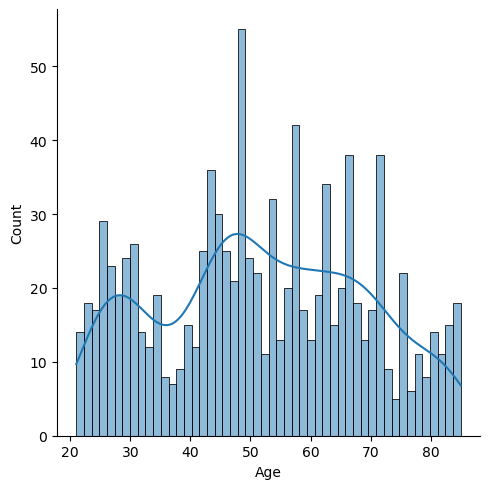

In [22]:
# Viz to find out the age distribution
plt.figure(figsize=(15,8))
sns.displot(new_cust['Age'],kde=True,bins=50)

<b> Looking at the age field seem that there is no discripency in the data <b>

### Creating Age Group Column

In [23]:
new_cust['Age Group'] = new_cust['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

In [24]:
new_cust['Age Group']

0      70
1      60
2      50
3      50
4      60
       ..
995    70
996    30
997    70
998    80
999    70
Name: Age Group, Length: 983, dtype: int64

<Figure size 1000x800 with 0 Axes>

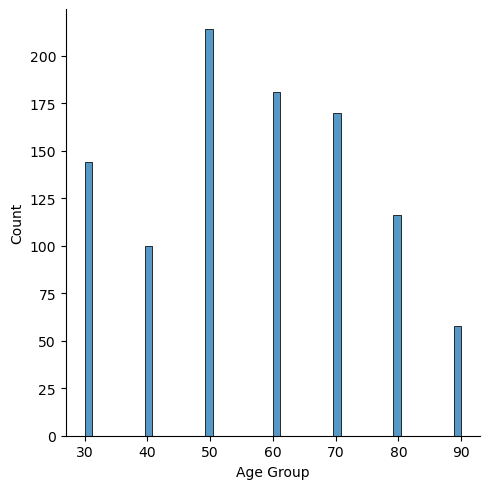

In [25]:
# Viz to find out the Age Group Distribution
plt.figure(figsize=(10,8))
sns.displot(new_cust['Age Group'],kde=False,bins=50)

### 2.3 Job Title

In [26]:
new_cust[new_cust['job_title'].isnull()]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,Age Group
15,Dukie,Swire,Male,88,1954-03-31,NaN,Manufacturing,Affluent Customer,N,Yes,5,64 Granby Parkway,2500,NSW,Australia,8,16,1.562500,69,70
25,Rourke,Gillbard,Male,11,1945-08-03,NaN,Property,Mass Customer,N,No,17,75 Cordelia Trail,4817,QLD,Australia,4,26,1.468750,78,80
29,Rhona,De Freyne,Female,45,1960-11-22,NaN,Health,High Net Worth,N,No,8,11184 East Drive,3056,VIC,Australia,10,30,1.460938,62,70
30,Sharron,Claibourn,Female,62,1980-01-26,NaN,Financial Services,High Net Worth,N,Yes,17,555 Hermina Avenue,2280,NSW,Australia,8,30,1.460938,43,50
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,15,240 Acker Avenue,3190,VIC,Australia,8,38,1.437500,44,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,Candy,None,Female,23,1977-12-08,NaN,Financial Services,Mass Customer,N,No,6,59252 Maryland Drive,3500,VIC,Australia,3,951,0.450500,45,50
953,Noami,Cokly,Female,74,1962-09-17,NaN,Manufacturing,Mass Customer,N,Yes,15,2886 Buena Vista Terrace,2038,NSW,Australia,11,954,0.450000,60,70
971,Frieda,Tavinor,Female,43,1999-03-04,NaN,NaN,Affluent Customer,N,No,10,7 Mallory Lane,3064,VIC,Australia,6,972,0.430000,24,30
972,Ellwood,Budden,Male,82,1998-06-03,NaN,Health,Mass Customer,N,Yes,11,79907 Randy Center,2192,NSW,Australia,10,972,0.430000,25,30


<b> Since Percentage of missing values for Job Titles is 11%. We will replace null values with Missing. <b>

In [27]:
new_cust['job_title'].fillna('Missing', inplace=True,axis=0)

In [28]:
new_cust['job_title'].isnull().sum()

0

Currently there are no missing values for Job Title columns

### 2.4 Job Industry Category

In [29]:
new_cust['job_industry_category'].isnull().sum()

165

Since Percentage of null values in Job Industry category is 16%, we can replace the value with Missing.

In [30]:
new_cust['job_industry_category'].fillna('Missing',inplace=True,axis=0)

In [31]:
new_cust['job_industry_category'].isnull().sum()

0

Currently there are no missing values for Job Industry Category columns.

<b> Finally there are no Missing Values in the current dataset <b>

In [32]:
new_cust.isnull().sum()

first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
address                                0
postcode                               0
state                                  0
country                                0
property_valuation                     0
Rank                                   0
Value                                  0
Age                                    0
Age Group                              0
dtype: int64

In [33]:
print(f"Total Number of records after removing Missing Values: {new_cust.shape[0]}")

Total Number of records after removing Missing Values: 983


## 3 Check whether the Data is In-Consistency

We will check whether the data is In consistence / Typo error data is present in the categorical columns.<br>
The Columns to checked are <b> 'gender', 'Wealth_segment', 'deceased_indicator','Owns_car' <b>

### 3.1 Gender

In [34]:
new_cust.gender.value_counts()

Female    513
Male      470
Name: gender, dtype: int64

Seems that there is no inconsistence in Gender column

### 3.2 Wealth Segment

In [35]:
new_cust.wealth_segment.value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

Seems that there is no inconsistence in Wealth segment column.

### 3.3 Deceased Indicator

In [36]:
new_cust.deceased_indicator.value_counts()

N    983
Name: deceased_indicator, dtype: int64

Seems that there is no inconsistence in deceased_indicator column

### 3.4 Owns a Car

In [37]:
new_cust.owns_car.value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

Seems that there is no inconsistence in Owns a car

### 3.5 State, Country

In [38]:
new_cust.state.value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

In [39]:
new_cust.country.value_counts()

Australia    983
Name: country, dtype: int64

### 3.6 Tenure

In [43]:
new_cust.tenure.describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

C:\Users\Rakesh Rao\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

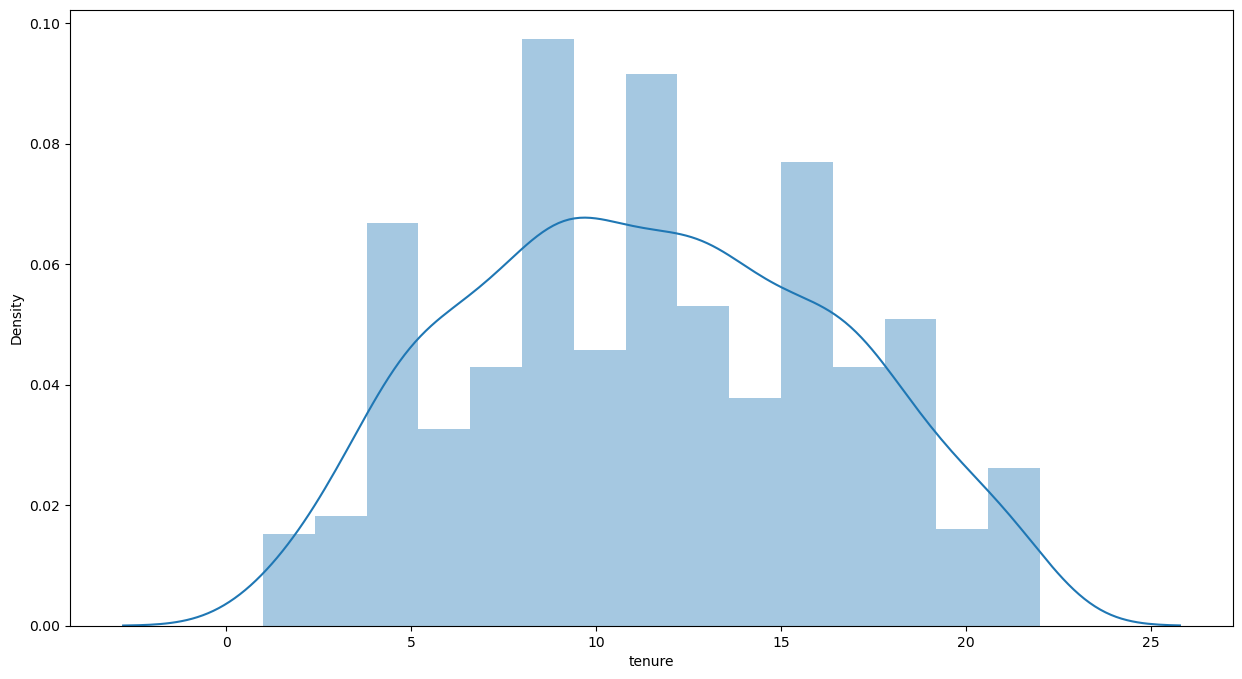

In [49]:
# Distribution of tenure

plt.figure(figsize=(15,8))
sns.distplot(new_cust.tenure)

# 4. Checking Duplicates

We need to ensure that there is no duplicate records in the dataset. This may lead to error in data analysis due to poor data qulity. If there are any duplicates then we need to drop the duplicates.

In [50]:
new_cust_dedupped = new_cust.drop_duplicates()

print(f"Number of records in the Actual dataSet: {new_cust.shape[0]}")
print(f"Number of records after droppong the duplicates: {new_cust.shape[0]}")

Number of records in the Actual dataSet: 983
Number of records after droppong the duplicates: 983


Since the both the numbers are same. Seems that there is no Duplicate data in the dataset.

# 5. Exporting the Cleaned Data set to CSV.

In [51]:
new_cust.to_csv("NewCustomerList_Cleaned.csv",index=False)